In [13]:
import numpy as np
import pandas as pd
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [14]:
breast_cancer = dt.load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
df['target'] = breast_cancer.target
print(df.shape)
df

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
# checking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [17]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [18]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [19]:
df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [20]:
X = df.drop('target', axis = 1)
y = df['target']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns= breast_cancer.feature_names)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [23]:
activation_functions = ['relu', 'sigmoid', 'tanh']
hidden_layers_range = [1, 2, 3]  # Number of hidden layers
neurons_range = [10, 20, 30]     # Number of neurons in each hidden layer
learning_rates = [0.001, 0.01, 0.1]
epochs_range = [10, 20, 50]
# Define parameter ranges
input_shape = X_train.shape[1]
performance_matrix = []

In [24]:
# Iterate through different parameter combinations
for activation in activation_functions:
    for num_layers in hidden_layers_range:
        for neurons in neurons_range:
            for lr in learning_rates:
                for epochs in epochs_range:
                    
                    # Create the model
                    model = tf.Module()
                    layers = [tf.keras.layers.InputLayer(input_shape=(input_shape,))]
                    
                    # Add hidden layers
                    for _ in range(num_layers):
                        layers.append(tf.keras.layers.Dense(neurons, activation=activation))
                    
                    # Output layer
                    layers.append(tf.keras.layers.Dense(2, activation='sigmoid'))
                    
                    # Build the model
                    model = tf.keras.Sequential(layers)
                    
                    # Compile the model with varying learning rates
                    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
                    model.compile(optimizer=optimizer, 
                                  loss='sparse_categorical_crossentropy', 
                                  metrics=['accuracy'])
                    
                    # Train the model
                    history = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, verbose=0)
                    
                    # Evaluate the model on the test set
                    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
                    
                    # Store results in matrix
                    performance_matrix.append({
                        'activation': activation,
                        'layers': num_layers,
                        'neurons': neurons,
                        'learning_rate': lr,
                        'epochs': epochs,
                        'train_accuracy': history.history['accuracy'][-1],
                        'val_accuracy': history.history['val_accuracy'][-1],
                        'test_accuracy': test_acc,
                        'test_loss': test_loss
                    })
                    
                    # Print progress
                    print(f"Activation: {activation}, Layers: {num_layers}, Neurons: {neurons}, LR: {lr}, Epochs: {epochs}")
                    print(f"Test Accuracy: {test_acc}, Test Loss: {test_loss}")


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2024-09-17 23:21:26.726548: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-09-17 23:21:26.726573: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: vivekup3424-Nitro-ANV15-51
2024-09-17 23:21:26.726577: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: vivekup3424-Nitro-ANV15-51
2024-09-17 23:21:26.726711: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.107.2
2024-09-17 23:21:26.726722: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 550.107.2
2024-09-17 23:21:26.726724: I external/local_

Activation: relu, Layers: 1, Neurons: 10, LR: 0.001, Epochs: 10
Test Accuracy: 0.8245614171028137, Test Loss: 0.5673216581344604


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 10, LR: 0.001, Epochs: 20
Test Accuracy: 0.9122806787490845, Test Loss: 0.3368993401527405


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 10, LR: 0.001, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.14802123606204987


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 10, LR: 0.01, Epochs: 10
Test Accuracy: 0.9473684430122375, Test Loss: 0.1289079636335373


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 10, LR: 0.01, Epochs: 20
Test Accuracy: 0.9385964870452881, Test Loss: 0.09615439921617508


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 10, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.0852292850613594


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 10, LR: 0.1, Epochs: 10
Test Accuracy: 0.9035087823867798, Test Loss: 0.20025047659873962


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 10, LR: 0.1, Epochs: 20
Test Accuracy: 0.9649122953414917, Test Loss: 0.14744190871715546


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 10, LR: 0.1, Epochs: 50
Test Accuracy: 0.6052631735801697, Test Loss: 0.6711071729660034


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 20, LR: 0.001, Epochs: 10
Test Accuracy: 0.8947368264198303, Test Loss: 0.3769860863685608


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 20, LR: 0.001, Epochs: 20
Test Accuracy: 0.9035087823867798, Test Loss: 0.2604169547557831


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 20, LR: 0.001, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.12730316817760468


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 20, LR: 0.01, Epochs: 10
Test Accuracy: 0.9473684430122375, Test Loss: 0.12139837443828583


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 20, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.09099546819925308


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 20, LR: 0.01, Epochs: 50
Test Accuracy: 0.9649122953414917, Test Loss: 0.08784743398427963


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 20, LR: 0.1, Epochs: 10
Test Accuracy: 0.9035087823867798, Test Loss: 0.21730631589889526


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 20, LR: 0.1, Epochs: 20
Test Accuracy: 0.6052631735801697, Test Loss: 0.671141505241394


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 20, LR: 0.1, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.10957425832748413


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 30, LR: 0.001, Epochs: 10
Test Accuracy: 0.8859649300575256, Test Loss: 0.34563329815864563


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 30, LR: 0.001, Epochs: 20
Test Accuracy: 0.9122806787490845, Test Loss: 0.21315625309944153


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 30, LR: 0.001, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.1270207166671753


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 30, LR: 0.01, Epochs: 10
Test Accuracy: 0.9385964870452881, Test Loss: 0.12306895107030869


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 30, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.10305586457252502


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 30, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.10973364859819412


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 30, LR: 0.1, Epochs: 10
Test Accuracy: 0.9210526347160339, Test Loss: 0.17854981124401093


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 30, LR: 0.1, Epochs: 20
Test Accuracy: 0.8859649300575256, Test Loss: 0.36943909525871277


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 1, Neurons: 30, LR: 0.1, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.11966779828071594


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 10, LR: 0.001, Epochs: 10
Test Accuracy: 0.9035087823867798, Test Loss: 0.4256930351257324


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 10, LR: 0.001, Epochs: 20
Test Accuracy: 0.9298245906829834, Test Loss: 0.2392076998949051


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 10, LR: 0.001, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.10474123805761337


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 10, LR: 0.01, Epochs: 10
Test Accuracy: 0.9385964870452881, Test Loss: 0.12376534938812256


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 10, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.09636048972606659


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 10, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.09644368290901184


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 10, LR: 0.1, Epochs: 10
Test Accuracy: 0.9210526347160339, Test Loss: 0.2545408308506012


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 10, LR: 0.1, Epochs: 20
Test Accuracy: 0.8947368264198303, Test Loss: 0.3697630763053894


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 10, LR: 0.1, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.10104815661907196


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 20, LR: 0.001, Epochs: 10
Test Accuracy: 0.9122806787490845, Test Loss: 0.2857898473739624


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 20, LR: 0.001, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.13982263207435608


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 20, LR: 0.001, Epochs: 50
Test Accuracy: 0.9649122953414917, Test Loss: 0.08041594177484512


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 20, LR: 0.01, Epochs: 10
Test Accuracy: 0.9210526347160339, Test Loss: 0.16982142627239227


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 20, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.08837367594242096


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 20, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.0965227410197258


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 20, LR: 0.1, Epochs: 10
Test Accuracy: 0.9298245906829834, Test Loss: 0.1936587244272232


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 20, LR: 0.1, Epochs: 20
Test Accuracy: 0.9561403393745422, Test Loss: 0.12280724942684174


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 20, LR: 0.1, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.09543030709028244


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 30, LR: 0.001, Epochs: 10
Test Accuracy: 0.8947368264198303, Test Loss: 0.22180861234664917


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 30, LR: 0.001, Epochs: 20
Test Accuracy: 0.9561403393745422, Test Loss: 0.1024119108915329


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 30, LR: 0.001, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.07900676131248474


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 30, LR: 0.01, Epochs: 10
Test Accuracy: 0.859649121761322, Test Loss: 0.26522284746170044


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 30, LR: 0.01, Epochs: 20
Test Accuracy: 0.9385964870452881, Test Loss: 0.09853702038526535


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 30, LR: 0.01, Epochs: 50
Test Accuracy: 0.9210526347160339, Test Loss: 0.2753238379955292


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 30, LR: 0.1, Epochs: 10
Test Accuracy: 0.9385964870452881, Test Loss: 0.17944972217082977


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 30, LR: 0.1, Epochs: 20
Test Accuracy: 0.8859649300575256, Test Loss: 0.38057583570480347


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 2, Neurons: 30, LR: 0.1, Epochs: 50
Test Accuracy: 0.9298245906829834, Test Loss: 0.15360437333583832


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 10, LR: 0.001, Epochs: 10
Test Accuracy: 0.9122806787490845, Test Loss: 0.2658332586288452


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 10, LR: 0.001, Epochs: 20
Test Accuracy: 0.9385964870452881, Test Loss: 0.13697947561740875


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 10, LR: 0.001, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.08699215203523636


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 10, LR: 0.01, Epochs: 10
Test Accuracy: 0.8508771657943726, Test Loss: 0.385434091091156


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 10, LR: 0.01, Epochs: 20
Test Accuracy: 0.9561403393745422, Test Loss: 0.10419920086860657


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 10, LR: 0.01, Epochs: 50
Test Accuracy: 0.9298245906829834, Test Loss: 0.22081972658634186


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 10, LR: 0.1, Epochs: 10
Test Accuracy: 0.6052631735801697, Test Loss: 0.6711351275444031


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 10, LR: 0.1, Epochs: 20
Test Accuracy: 0.9561403393745422, Test Loss: 0.11553923785686493


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 10, LR: 0.1, Epochs: 50
Test Accuracy: 0.9385964870452881, Test Loss: 0.13152079284191132


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 20, LR: 0.001, Epochs: 10
Test Accuracy: 0.9210526347160339, Test Loss: 0.203517884016037


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 20, LR: 0.001, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.1243429109454155


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 20, LR: 0.001, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.12318652123212814


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 20, LR: 0.01, Epochs: 10
Test Accuracy: 0.9385964870452881, Test Loss: 0.13535954058170319


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 20, LR: 0.01, Epochs: 20
Test Accuracy: 0.9385964870452881, Test Loss: 0.11159520596265793


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 20, LR: 0.01, Epochs: 50
Test Accuracy: 0.9035087823867798, Test Loss: 0.31502100825309753


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 20, LR: 0.1, Epochs: 10
Test Accuracy: 0.9385964870452881, Test Loss: 0.15845030546188354


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 20, LR: 0.1, Epochs: 20
Test Accuracy: 0.859649121761322, Test Loss: 0.3956577479839325


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 20, LR: 0.1, Epochs: 50
Test Accuracy: 0.9736841917037964, Test Loss: 0.08598551154136658


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 30, LR: 0.001, Epochs: 10
Test Accuracy: 0.9561403393745422, Test Loss: 0.15059217810630798


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 30, LR: 0.001, Epochs: 20
Test Accuracy: 0.9385964870452881, Test Loss: 0.09688380360603333


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 30, LR: 0.001, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.0905500203371048


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 30, LR: 0.01, Epochs: 10
Test Accuracy: 0.9298245906829834, Test Loss: 0.20510047674179077


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 30, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.1264127641916275


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 30, LR: 0.01, Epochs: 50
Test Accuracy: 0.9385964870452881, Test Loss: 0.16728192567825317


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 30, LR: 0.1, Epochs: 10
Test Accuracy: 0.9385964870452881, Test Loss: 0.20729786157608032


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 30, LR: 0.1, Epochs: 20
Test Accuracy: 0.9035087823867798, Test Loss: 0.4499187171459198


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: relu, Layers: 3, Neurons: 30, LR: 0.1, Epochs: 50
Test Accuracy: 0.9298245906829834, Test Loss: 0.15747398138046265


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 10, LR: 0.001, Epochs: 10
Test Accuracy: 0.6491228342056274, Test Loss: 0.5843271017074585


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 10, LR: 0.001, Epochs: 20
Test Accuracy: 0.8771929740905762, Test Loss: 0.4701409637928009


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 10, LR: 0.001, Epochs: 50
Test Accuracy: 0.9298245906829834, Test Loss: 0.3169436454772949


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 10, LR: 0.01, Epochs: 10
Test Accuracy: 0.9298245906829834, Test Loss: 0.17907805740833282


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 10, LR: 0.01, Epochs: 20
Test Accuracy: 0.9561403393745422, Test Loss: 0.12165778130292892


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 10, LR: 0.01, Epochs: 50
Test Accuracy: 0.9649122953414917, Test Loss: 0.0825638622045517


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 10, LR: 0.1, Epochs: 10
Test Accuracy: 0.8859649300575256, Test Loss: 0.27138030529022217


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 10, LR: 0.1, Epochs: 20
Test Accuracy: 0.9122806787490845, Test Loss: 0.17892001569271088


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 10, LR: 0.1, Epochs: 50
Test Accuracy: 0.9122806787490845, Test Loss: 0.1981816440820694


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 20, LR: 0.001, Epochs: 10
Test Accuracy: 0.7456140518188477, Test Loss: 0.5736932754516602


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 20, LR: 0.001, Epochs: 20
Test Accuracy: 0.8771929740905762, Test Loss: 0.4505367875099182


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 20, LR: 0.001, Epochs: 50
Test Accuracy: 0.9385964870452881, Test Loss: 0.22705204784870148


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 20, LR: 0.01, Epochs: 10
Test Accuracy: 0.9298245906829834, Test Loss: 0.17228615283966064


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 20, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.10770910978317261


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 20, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.08024399727582932


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 20, LR: 0.1, Epochs: 10
Test Accuracy: 0.9035087823867798, Test Loss: 0.24546515941619873


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 20, LR: 0.1, Epochs: 20
Test Accuracy: 0.9298245906829834, Test Loss: 0.12138695269823074


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 20, LR: 0.1, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.1205395832657814


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 30, LR: 0.001, Epochs: 10
Test Accuracy: 0.7456140518188477, Test Loss: 0.5551745891571045


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 30, LR: 0.001, Epochs: 20
Test Accuracy: 0.9298245906829834, Test Loss: 0.3358672857284546


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 30, LR: 0.001, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.18039104342460632


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 30, LR: 0.01, Epochs: 10
Test Accuracy: 0.9473684430122375, Test Loss: 0.14159859716892242


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 30, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.09521465748548508


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 30, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.0817752555012703


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 30, LR: 0.1, Epochs: 10
Test Accuracy: 0.9035087823867798, Test Loss: 0.22627097368240356


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 30, LR: 0.1, Epochs: 20
Test Accuracy: 0.9210526347160339, Test Loss: 0.16088251769542694


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 1, Neurons: 30, LR: 0.1, Epochs: 50
Test Accuracy: 0.9035087823867798, Test Loss: 0.2277134358882904


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 10, LR: 0.001, Epochs: 10
Test Accuracy: 0.6052631735801697, Test Loss: 0.6339285969734192


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 10, LR: 0.001, Epochs: 20
Test Accuracy: 0.6228070259094238, Test Loss: 0.5731964707374573


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 10, LR: 0.001, Epochs: 50
Test Accuracy: 0.9298245906829834, Test Loss: 0.25294265151023865


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 10, LR: 0.01, Epochs: 10
Test Accuracy: 0.9473684430122375, Test Loss: 0.1472260057926178


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 10, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.10187801718711853


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 10, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.08564247190952301


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 10, LR: 0.1, Epochs: 10
Test Accuracy: 0.8947368264198303, Test Loss: 0.3006371557712555


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 10, LR: 0.1, Epochs: 20
Test Accuracy: 0.9649122953414917, Test Loss: 0.1211826354265213


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 10, LR: 0.1, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.10420934110879898


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 20, LR: 0.001, Epochs: 10
Test Accuracy: 0.6052631735801697, Test Loss: 0.6326957941055298


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 20, LR: 0.001, Epochs: 20
Test Accuracy: 0.7543859481811523, Test Loss: 0.5314266681671143


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 20, LR: 0.001, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.1814558357000351


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 20, LR: 0.01, Epochs: 10
Test Accuracy: 0.9385964870452881, Test Loss: 0.11790330708026886


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 20, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.09271515160799026


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 20, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.09190598130226135


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 20, LR: 0.1, Epochs: 10
Test Accuracy: 0.9210526347160339, Test Loss: 0.30696436762809753


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 20, LR: 0.1, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.110924132168293


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 20, LR: 0.1, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.10803275555372238


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 30, LR: 0.001, Epochs: 10
Test Accuracy: 0.640350878238678, Test Loss: 0.5677297711372375


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 30, LR: 0.001, Epochs: 20
Test Accuracy: 0.8859649300575256, Test Loss: 0.41190090775489807


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 30, LR: 0.001, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.1359461098909378


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 30, LR: 0.01, Epochs: 10
Test Accuracy: 0.9473684430122375, Test Loss: 0.1237073689699173


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 30, LR: 0.01, Epochs: 20
Test Accuracy: 0.9385964870452881, Test Loss: 0.10061412304639816


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 30, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.09756127744913101


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 30, LR: 0.1, Epochs: 10
Test Accuracy: 0.8859649300575256, Test Loss: 0.35890141129493713


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 30, LR: 0.1, Epochs: 20
Test Accuracy: 0.9649122953414917, Test Loss: 0.10040058195590973


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 2, Neurons: 30, LR: 0.1, Epochs: 50
Test Accuracy: 0.9385964870452881, Test Loss: 0.15355956554412842


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 10, LR: 0.001, Epochs: 10
Test Accuracy: 0.6052631735801697, Test Loss: 0.6666305065155029


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 10, LR: 0.001, Epochs: 20
Test Accuracy: 0.6052631735801697, Test Loss: 0.6364964842796326


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 10, LR: 0.001, Epochs: 50
Test Accuracy: 0.9385964870452881, Test Loss: 0.21325571835041046


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 10, LR: 0.01, Epochs: 10
Test Accuracy: 0.9298245906829834, Test Loss: 0.17916339635849


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 10, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.10452508181333542


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 10, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.1040516197681427


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 10, LR: 0.1, Epochs: 10
Test Accuracy: 0.9122806787490845, Test Loss: 0.3155571222305298


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 10, LR: 0.1, Epochs: 20
Test Accuracy: 0.9649122953414917, Test Loss: 0.09077049791812897


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 10, LR: 0.1, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.11577273160219193


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 20, LR: 0.001, Epochs: 10
Test Accuracy: 0.6052631735801697, Test Loss: 0.6438036561012268


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 20, LR: 0.001, Epochs: 20
Test Accuracy: 0.6052631735801697, Test Loss: 0.5942419171333313


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 20, LR: 0.001, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.14405646920204163


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 20, LR: 0.01, Epochs: 10
Test Accuracy: 0.9298245906829834, Test Loss: 0.14475442469120026


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 20, LR: 0.01, Epochs: 20
Test Accuracy: 0.9385964870452881, Test Loss: 0.12609630823135376


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 20, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.1065916195511818


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 20, LR: 0.1, Epochs: 10
Test Accuracy: 0.9298245906829834, Test Loss: 0.22857049107551575


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 20, LR: 0.1, Epochs: 20
Test Accuracy: 0.9561403393745422, Test Loss: 0.12297498434782028


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 20, LR: 0.1, Epochs: 50
Test Accuracy: 0.9298245906829834, Test Loss: 0.24733807146549225


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 30, LR: 0.001, Epochs: 10
Test Accuracy: 0.6052631735801697, Test Loss: 0.6260712146759033


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 30, LR: 0.001, Epochs: 20
Test Accuracy: 0.9122806787490845, Test Loss: 0.3789248764514923


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 30, LR: 0.001, Epochs: 50
Test Accuracy: 0.9385964870452881, Test Loss: 0.11710190027952194


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 30, LR: 0.01, Epochs: 10
Test Accuracy: 0.9298245906829834, Test Loss: 0.1495181918144226


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 30, LR: 0.01, Epochs: 20
Test Accuracy: 0.9385964870452881, Test Loss: 0.12069442123174667


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 30, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.11128050088882446


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 30, LR: 0.1, Epochs: 10
Test Accuracy: 0.9385964870452881, Test Loss: 0.19563224911689758


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 30, LR: 0.1, Epochs: 20
Test Accuracy: 0.9210526347160339, Test Loss: 0.3563868999481201


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: sigmoid, Layers: 3, Neurons: 30, LR: 0.1, Epochs: 50
Test Accuracy: 0.9298245906829834, Test Loss: 0.30120551586151123


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 10, LR: 0.001, Epochs: 10
Test Accuracy: 0.9035087823867798, Test Loss: 0.37017354369163513


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 10, LR: 0.001, Epochs: 20
Test Accuracy: 0.9035087823867798, Test Loss: 0.274042546749115


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 10, LR: 0.001, Epochs: 50
Test Accuracy: 0.9298245906829834, Test Loss: 0.1682884842157364


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 10, LR: 0.01, Epochs: 10
Test Accuracy: 0.9473684430122375, Test Loss: 0.11964364349842072


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 10, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.09318093210458755


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 10, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.09175679832696915


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 10, LR: 0.1, Epochs: 10
Test Accuracy: 0.9035087823867798, Test Loss: 0.20962801575660706


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 10, LR: 0.1, Epochs: 20
Test Accuracy: 0.8421052694320679, Test Loss: 0.5975863337516785


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 10, LR: 0.1, Epochs: 50
Test Accuracy: 0.9122806787490845, Test Loss: 0.21981322765350342


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 20, LR: 0.001, Epochs: 10
Test Accuracy: 0.8771929740905762, Test Loss: 0.3702452778816223


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 20, LR: 0.001, Epochs: 20
Test Accuracy: 0.9122806787490845, Test Loss: 0.23113371431827545


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 20, LR: 0.001, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.13371142745018005


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 20, LR: 0.01, Epochs: 10
Test Accuracy: 0.9385964870452881, Test Loss: 0.12105309963226318


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 20, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.10219983756542206


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 20, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.10900283604860306


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 20, LR: 0.1, Epochs: 10
Test Accuracy: 0.9035087823867798, Test Loss: 0.20632904767990112


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 20, LR: 0.1, Epochs: 20
Test Accuracy: 0.8859649300575256, Test Loss: 0.34173551201820374


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 20, LR: 0.1, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.13484503328800201


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 30, LR: 0.001, Epochs: 10
Test Accuracy: 0.9035087823867798, Test Loss: 0.3346749246120453


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 30, LR: 0.001, Epochs: 20
Test Accuracy: 0.9122806787490845, Test Loss: 0.2053949385881424


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 30, LR: 0.001, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.1266685128211975


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 30, LR: 0.01, Epochs: 10
Test Accuracy: 0.9473684430122375, Test Loss: 0.13761818408966064


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 30, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.11215557157993317


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 30, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.1097477599978447


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 30, LR: 0.1, Epochs: 10
Test Accuracy: 0.9122806787490845, Test Loss: 0.19357405602931976


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 30, LR: 0.1, Epochs: 20
Test Accuracy: 0.8947368264198303, Test Loss: 0.34130850434303284


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 1, Neurons: 30, LR: 0.1, Epochs: 50
Test Accuracy: 0.8070175647735596, Test Loss: 1.6612937450408936


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 10, LR: 0.001, Epochs: 10
Test Accuracy: 0.8771929740905762, Test Loss: 0.39775151014328003


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 10, LR: 0.001, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.1742757260799408


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 10, LR: 0.001, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.10966244339942932


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 10, LR: 0.01, Epochs: 10
Test Accuracy: 0.9385964870452881, Test Loss: 0.14044246077537537


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 10, LR: 0.01, Epochs: 20
Test Accuracy: 0.9385964870452881, Test Loss: 0.13009917736053467


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 10, LR: 0.01, Epochs: 50
Test Accuracy: 0.9385964870452881, Test Loss: 0.1443636268377304


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 10, LR: 0.1, Epochs: 10
Test Accuracy: 0.9210526347160339, Test Loss: 0.3129173517227173


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 10, LR: 0.1, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.13730736076831818


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 10, LR: 0.1, Epochs: 50
Test Accuracy: 0.8684210777282715, Test Loss: 0.19373288750648499


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 20, LR: 0.001, Epochs: 10
Test Accuracy: 0.9122806787490845, Test Loss: 0.22259871661663055


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 20, LR: 0.001, Epochs: 20
Test Accuracy: 0.9298245906829834, Test Loss: 0.14523892104625702


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 20, LR: 0.001, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.08731575310230255


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 20, LR: 0.01, Epochs: 10
Test Accuracy: 0.9473684430122375, Test Loss: 0.12745356559753418


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 20, LR: 0.01, Epochs: 20
Test Accuracy: 0.9385964870452881, Test Loss: 0.12661904096603394


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 20, LR: 0.01, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.11862906068563461


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 20, LR: 0.1, Epochs: 10
Test Accuracy: 0.9298245906829834, Test Loss: 0.2465447038412094


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 20, LR: 0.1, Epochs: 20
Test Accuracy: 0.9210526347160339, Test Loss: 0.33793097734451294


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 20, LR: 0.1, Epochs: 50
Test Accuracy: 0.9824561476707458, Test Loss: 0.11471997946500778


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 30, LR: 0.001, Epochs: 10
Test Accuracy: 0.9122806787490845, Test Loss: 0.21743111312389374


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 30, LR: 0.001, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.10089436918497086


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 30, LR: 0.001, Epochs: 50
Test Accuracy: 0.9649122953414917, Test Loss: 0.08510487526655197


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 30, LR: 0.01, Epochs: 10
Test Accuracy: 0.8859649300575256, Test Loss: 0.3457925021648407


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 30, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.08712875097990036


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 30, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.0951860174536705


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 30, LR: 0.1, Epochs: 10
Test Accuracy: 0.9122806787490845, Test Loss: 0.2670501172542572


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 30, LR: 0.1, Epochs: 20
Test Accuracy: 0.9210526347160339, Test Loss: 0.23060443997383118


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 2, Neurons: 30, LR: 0.1, Epochs: 50
Test Accuracy: 0.9473684430122375, Test Loss: 0.7201326489448547


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 10, LR: 0.001, Epochs: 10
Test Accuracy: 0.9122806787490845, Test Loss: 0.2668905556201935


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 10, LR: 0.001, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.13555942475795746


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 10, LR: 0.001, Epochs: 50
Test Accuracy: 0.9385964870452881, Test Loss: 0.10341401398181915


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 10, LR: 0.01, Epochs: 10
Test Accuracy: 0.8508771657943726, Test Loss: 0.38650673627853394


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 10, LR: 0.01, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.11436470597982407


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 10, LR: 0.01, Epochs: 50
Test Accuracy: 0.9649122953414917, Test Loss: 0.08924978971481323


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 10, LR: 0.1, Epochs: 10
Test Accuracy: 0.9385964870452881, Test Loss: 0.21074095368385315


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 10, LR: 0.1, Epochs: 20
Test Accuracy: 0.9035087823867798, Test Loss: 0.6825383901596069


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 10, LR: 0.1, Epochs: 50
Test Accuracy: 0.9649122953414917, Test Loss: 0.1445842832326889


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 20, LR: 0.001, Epochs: 10
Test Accuracy: 0.9210526347160339, Test Loss: 0.17643219232559204


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 20, LR: 0.001, Epochs: 20
Test Accuracy: 0.9649122953414917, Test Loss: 0.10446766018867493


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 20, LR: 0.001, Epochs: 50
Test Accuracy: 0.9649122953414917, Test Loss: 0.08483605831861496


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 20, LR: 0.01, Epochs: 10
Test Accuracy: 0.9035087823867798, Test Loss: 0.260354220867157


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 20, LR: 0.01, Epochs: 20
Test Accuracy: 0.9122806787490845, Test Loss: 0.1513107568025589


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 20, LR: 0.01, Epochs: 50
Test Accuracy: 0.9561403393745422, Test Loss: 0.12161315232515335


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 20, LR: 0.1, Epochs: 10
Test Accuracy: 0.9473684430122375, Test Loss: 0.1558200716972351


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 20, LR: 0.1, Epochs: 20
Test Accuracy: 0.9561403393745422, Test Loss: 0.14739061892032623


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 20, LR: 0.1, Epochs: 50
Test Accuracy: 0.9649122953414917, Test Loss: 0.14537784457206726


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 30, LR: 0.001, Epochs: 10
Test Accuracy: 0.9122806787490845, Test Loss: 0.17709849774837494


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 30, LR: 0.001, Epochs: 20
Test Accuracy: 0.9473684430122375, Test Loss: 0.08673729002475739


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Activation: tanh, Layers: 3, Neurons: 30, LR: 0.001, Epochs: 50
Test Accuracy: 0.9649122953414917, Test Loss: 0.09903902560472488


/home/vivekup3424/Documents/Projects/python_projects/myenv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


KeyboardInterrupt: 

In [25]:
# Convert performance matrix to DataFrame for better analysis
performance_df = pd.DataFrame(performance_matrix)
# Display the top 5 best performing models
# print(performance_df.sort_values(by='test_accuracy', ascending=False).head())
performance_df


,activation,layers,neurons,learning_rate,epochs,train_accuracy,val_accuracy,test_accuracy,test_loss
0,relu,1,10,0.001,10,0.806846,0.804348,0.824561,0.567322
1,relu,1,10,0.001,20,0.911980,0.913043,0.912281,0.336899
2,relu,1,10,0.001,50,0.965770,0.934783,0.947368,0.148021
3,relu,1,10,0.010,10,0.970660,0.934783,0.947368,0.128908
4,relu,1,10,0.010,20,0.980440,0.934783,0.938596,0.096154
...,...,...,...,...,...,...,...,...,...
232,tanh,3,20,0.100,20,0.933985,0.956522,0.956140,0.147391
233,tanh,3,20,0.100,50,0.801956,0.934783,0.964912,0.145378
234,tanh,3,30,0.001,10,0.948655,0.934783,0.912281,0.177098
235,tanh,3,30,0.001,20,0.980440,0.956522,0.947368,0.086737


In [36]:
performance_df.to_csv('/home/vivekup3424/Documents/Projects/python_projects/Games-for-MLP-Training/performance_data.csv', index=False)

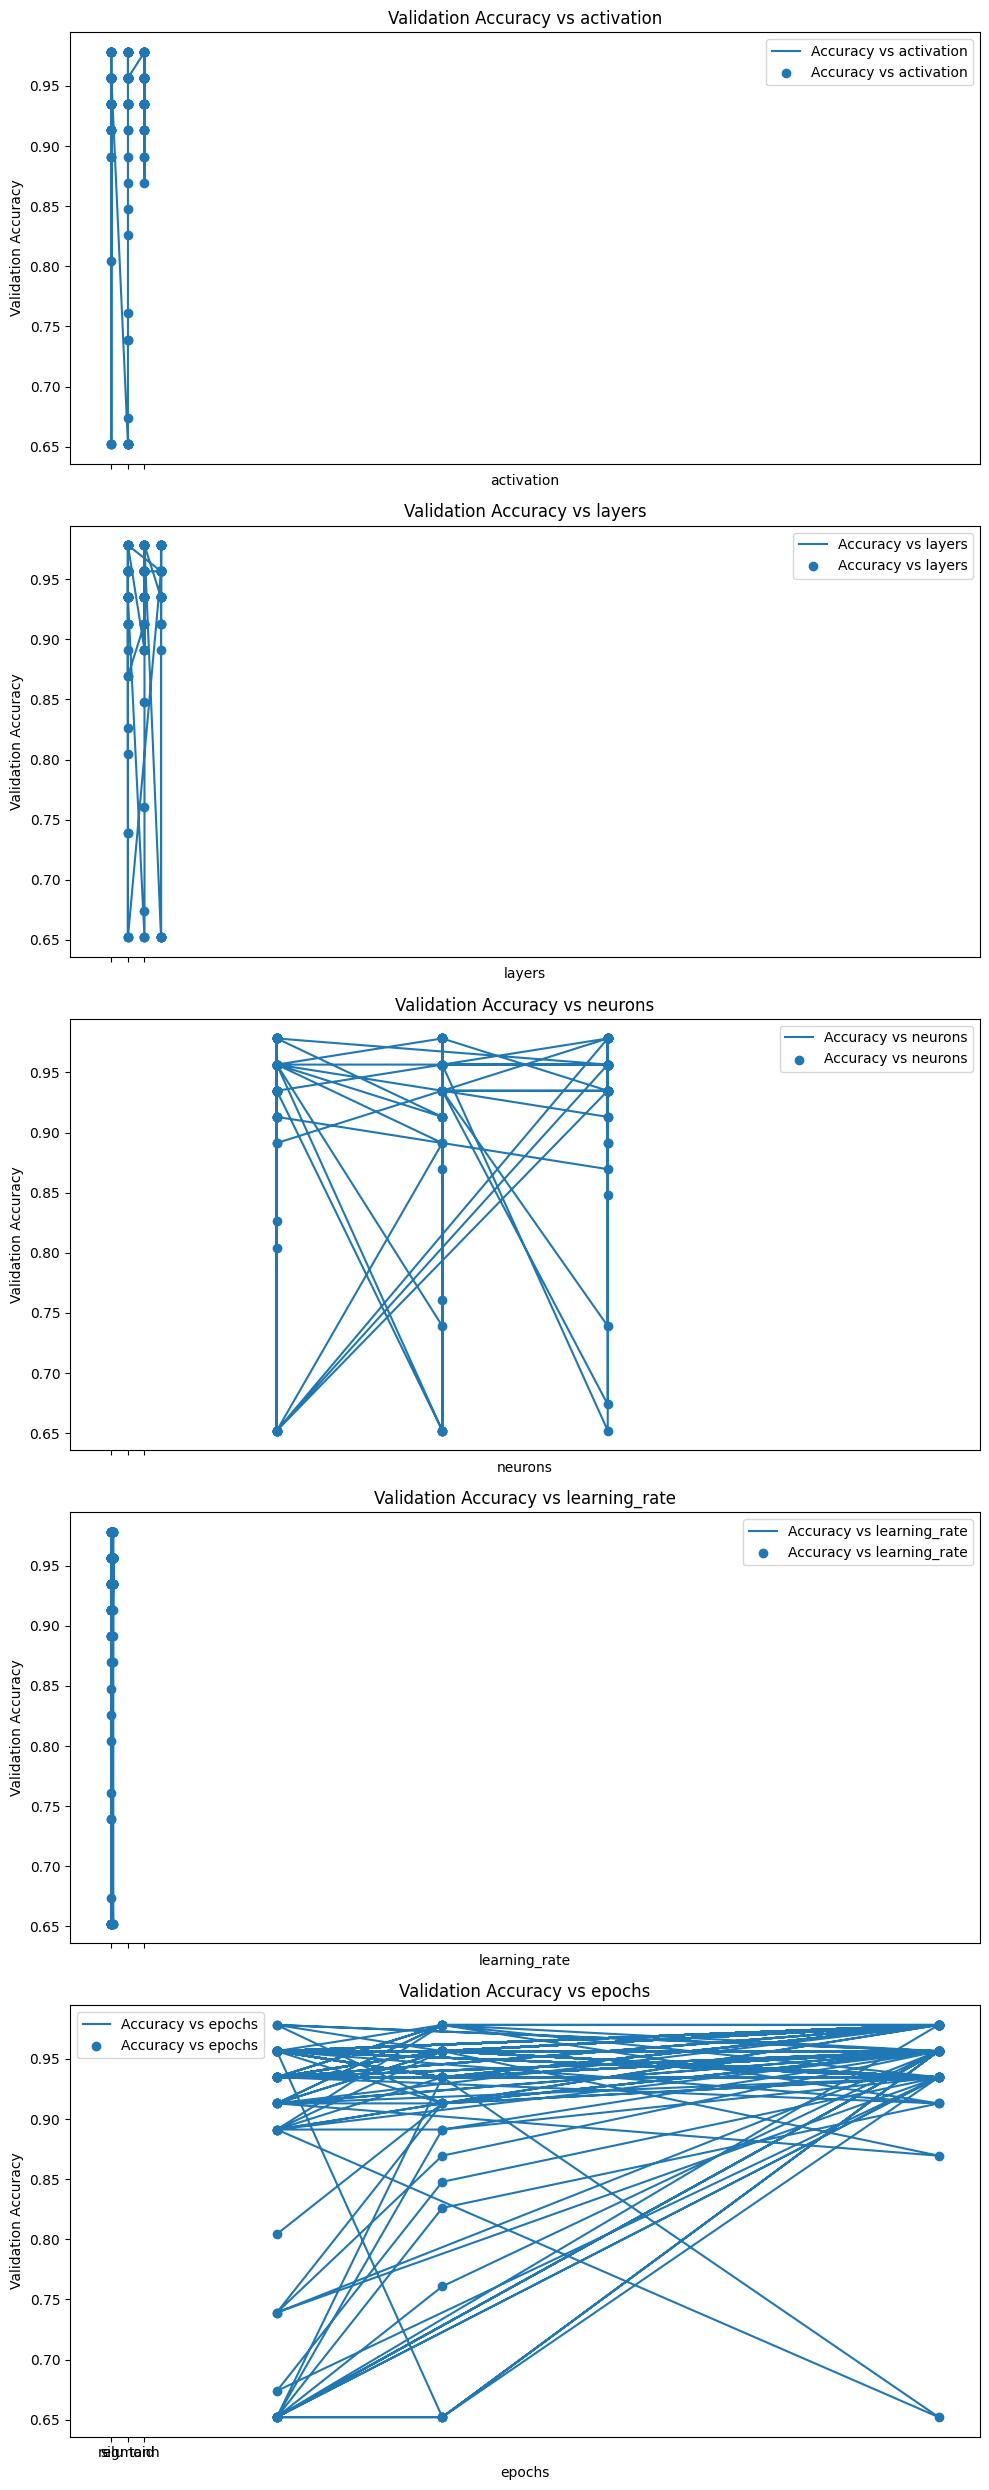

In [31]:
# Define the columns to plot against
columns_to_plot = ['activation', 'layers', 'neurons', 'learning_rate', 'epochs']

# Create subplots
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, len(columns_to_plot) * 5), sharex=True)

# Plot accuracy vs each column
for i, column in enumerate(columns_to_plot):
    ax = axs[i]
    ax.plot(performance_df[column], performance_df['val_accuracy'], label=f'Accuracy vs {column}')
    ax.scatter(performance_df[column], performance_df['val_accuracy'], label=f'Accuracy vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Validation Accuracy')
    ax.set_title(f'Validation Accuracy vs {column}')
    ax.legend()

plt.tight_layout()
plt.show()

In [16]:
n = len(performance_matrix)
print(performance_matrix[-1])

{'activation': 'tanh', 'layers': 3, 'neurons': 30, 'learning_rate': 0.1, 'epochs': 50, 'train_accuracy': 0.9902200698852539, 'val_accuracy': 0.97826087474823, 'test_accuracy': 0.9473684430122375, 'test_loss': 0.24483750760555267}


In [17]:
# training the Meural Network

history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9919 - loss: 0.0571 - val_accuracy: 0.9783 - val_loss: 0.0977
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9919 - loss: 0.0573 - val_accuracy: 0.9783 - val_loss: 0.0979
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9919 - loss: 0.0574 - val_accuracy: 0.9783 - val_loss: 0.1004
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9919 - loss: 0.0572 - val_accuracy: 0.9783 - val_loss: 0.1183
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9919 - loss: 0.0575 - val_accuracy: 0.9783 - val_loss: 0.1037
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9919 - loss: 0.0596 - val_accuracy: 0.9783 - val_loss: 0.0979
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9919 - loss: 0.0584 - val_accuracy: 0.9783 - val_loss: 0.0973
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9919 - loss: 0.0571 - val_accuracy: 0.9783 - val_loss

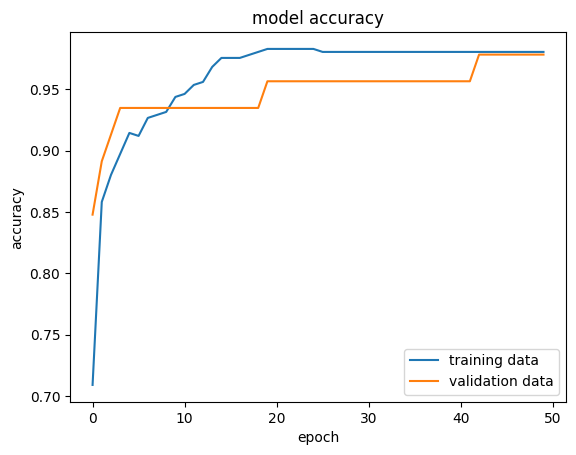

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

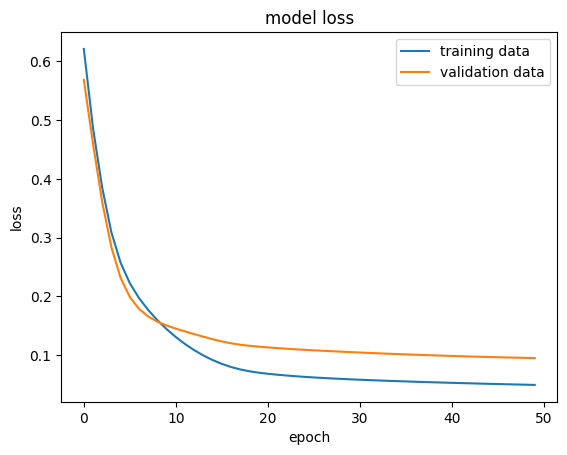

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')